In [1]:
import math, time, random, datetime

# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

In [4]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
#from catboost import CatBoostClassifier, Pool, cv

In [5]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/content/Attrition_prediction.csv")

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [9]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [10]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [11]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

In [12]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

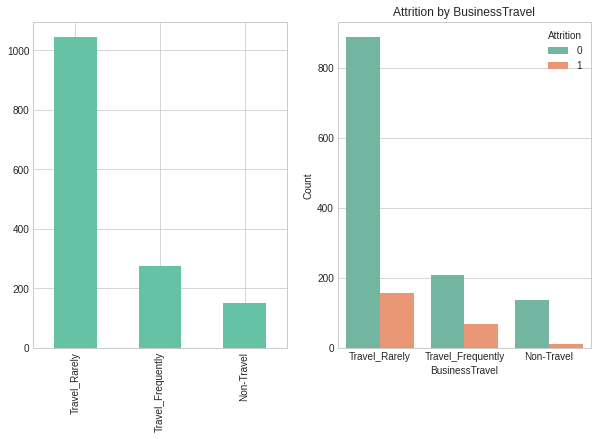

In [13]:
categorical_column_viz('BusinessTravel')

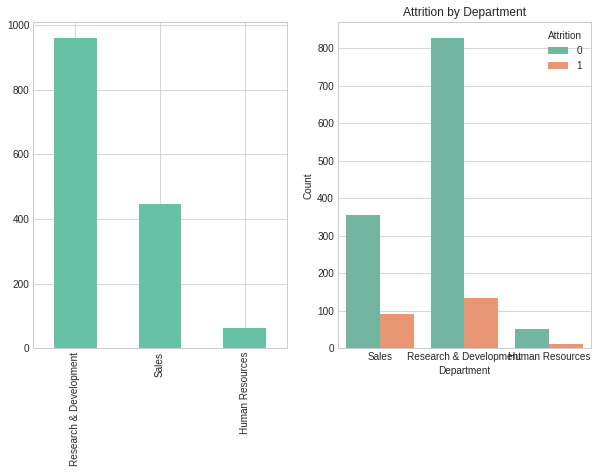

In [14]:
categorical_column_viz('Department')

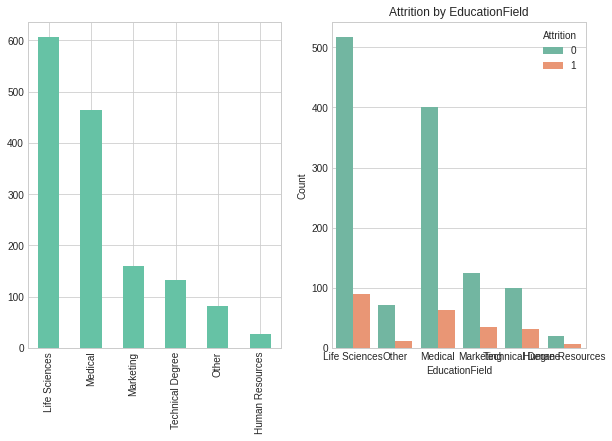

In [15]:
categorical_column_viz('EducationField')

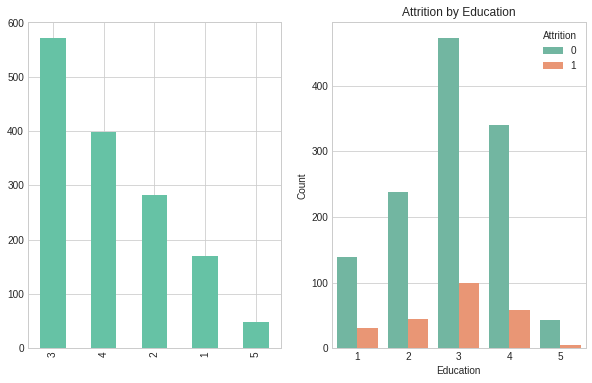

In [16]:
categorical_column_viz('Education')

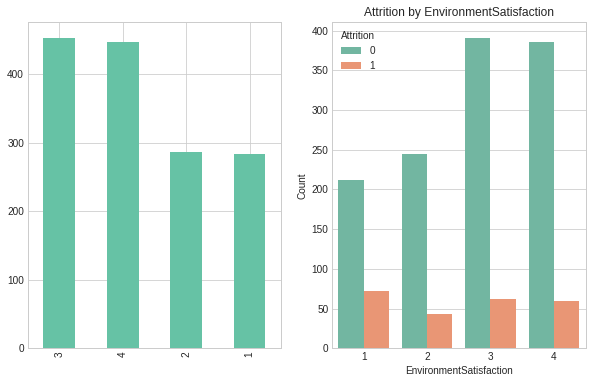

In [17]:
categorical_column_viz('EnvironmentSatisfaction')

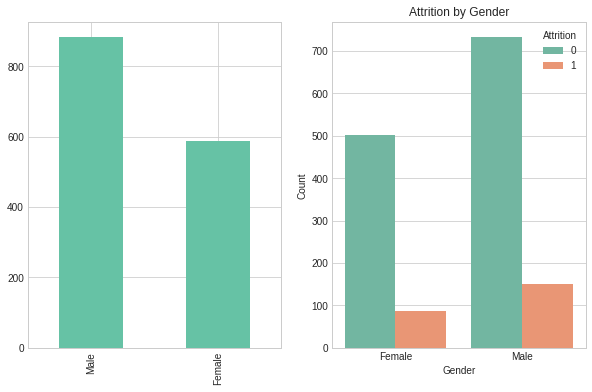

In [18]:
categorical_column_viz('Gender')

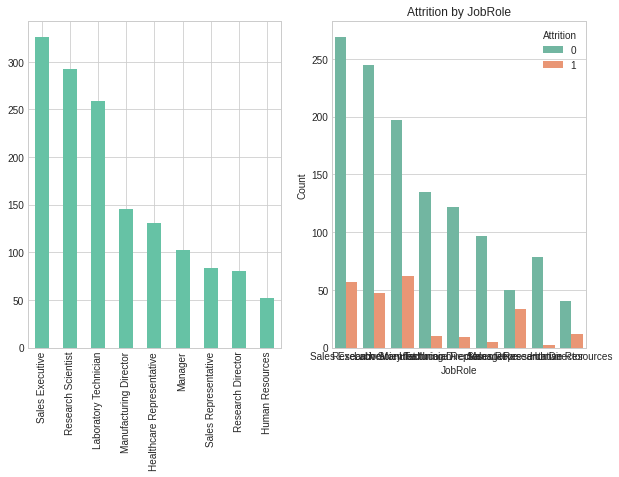

In [19]:
categorical_column_viz('JobRole')

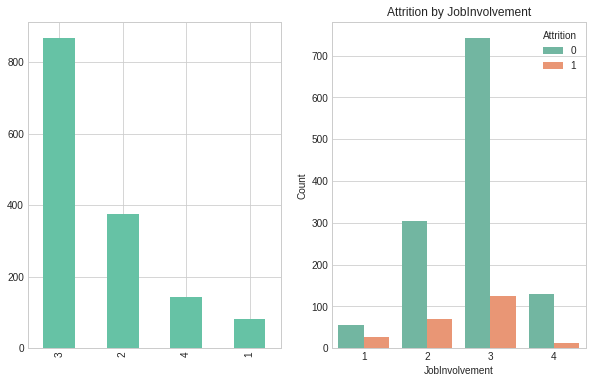

In [20]:
categorical_column_viz('JobInvolvement')

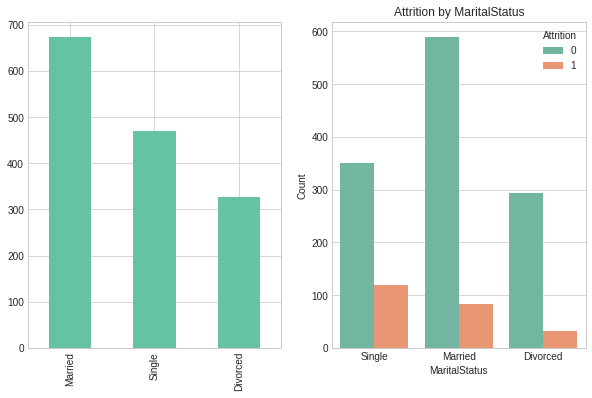

In [21]:
categorical_column_viz('MaritalStatus')

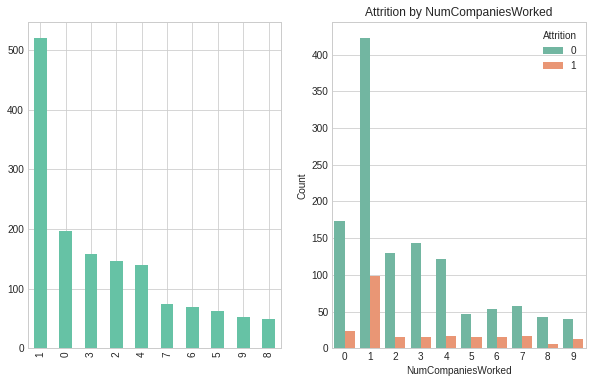

In [22]:
categorical_column_viz('NumCompaniesWorked')

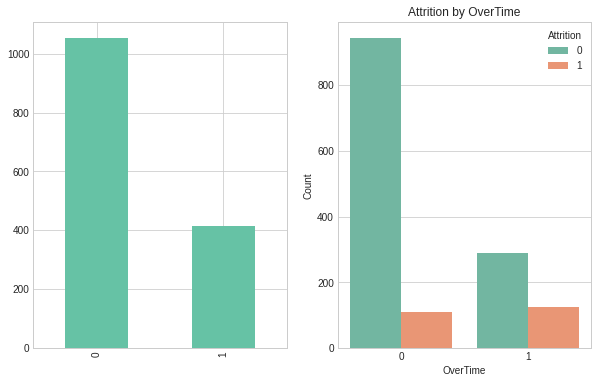

In [23]:
categorical_column_viz('OverTime')

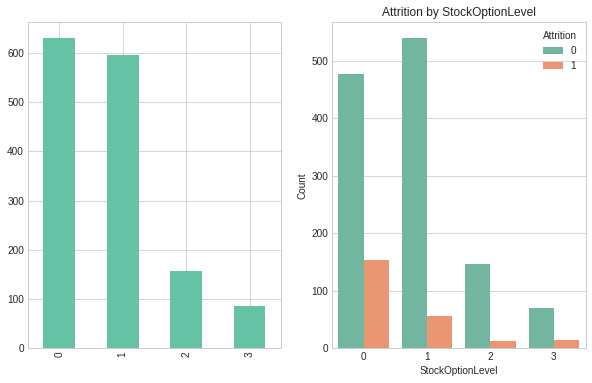

In [24]:
categorical_column_viz('StockOptionLevel')

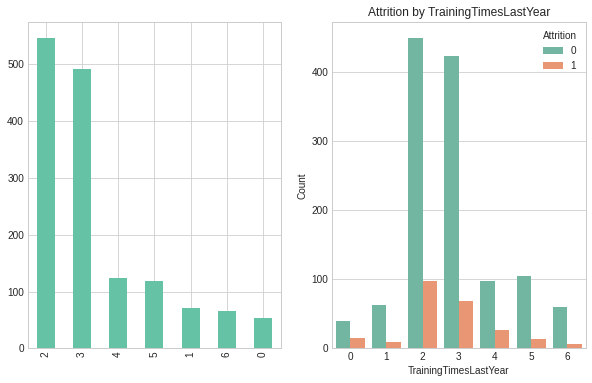

In [25]:
categorical_column_viz('TrainingTimesLastYear')

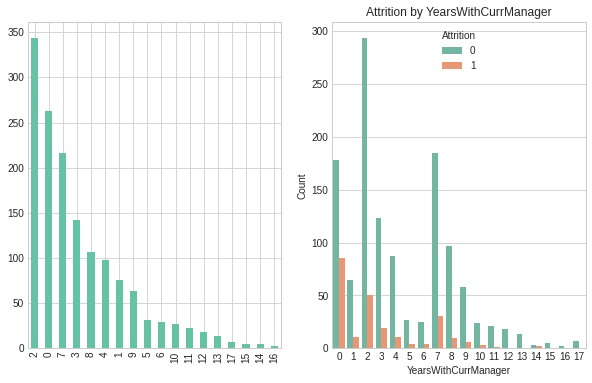

In [26]:
categorical_column_viz('YearsWithCurrManager')

In [27]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

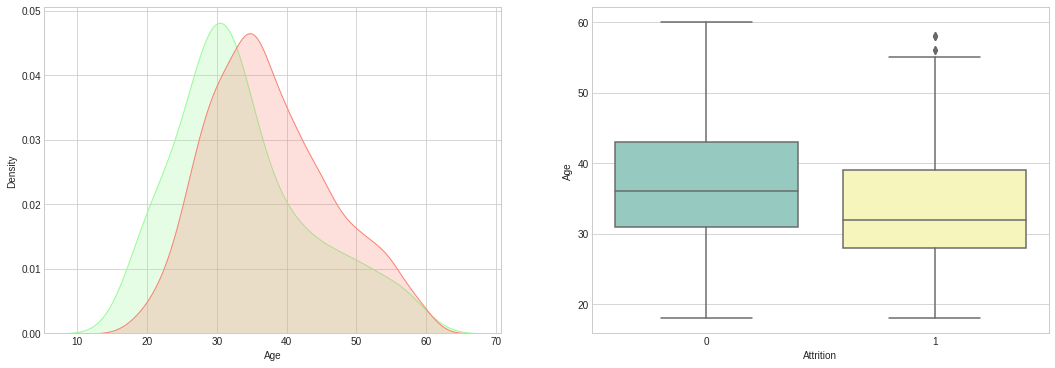

In [28]:
numerical_column_viz("Age")

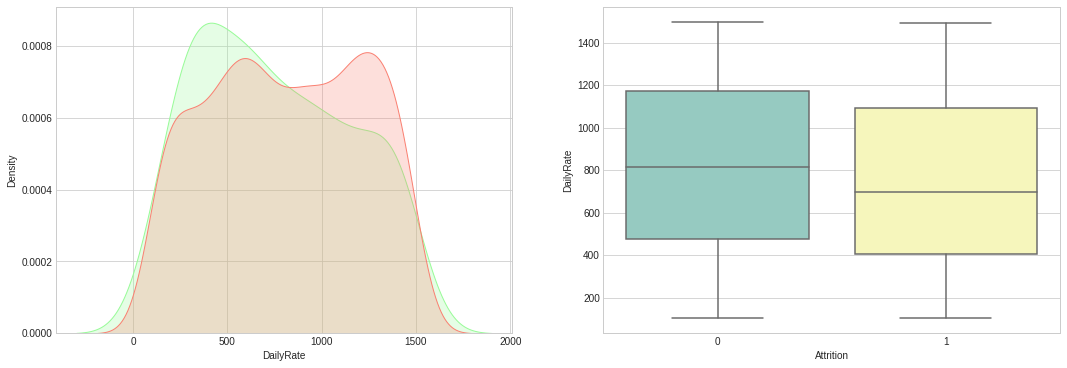

In [29]:
numerical_column_viz("DailyRate")

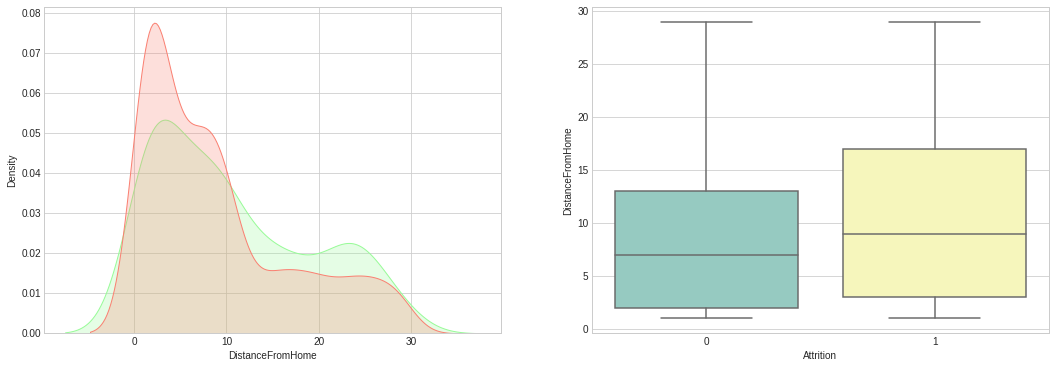

In [30]:
numerical_column_viz("DistanceFromHome")

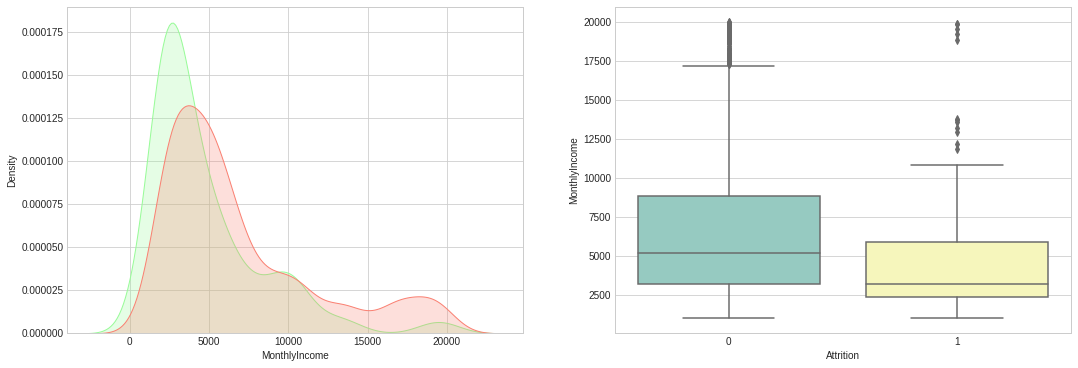

In [31]:
numerical_column_viz("MonthlyIncome")

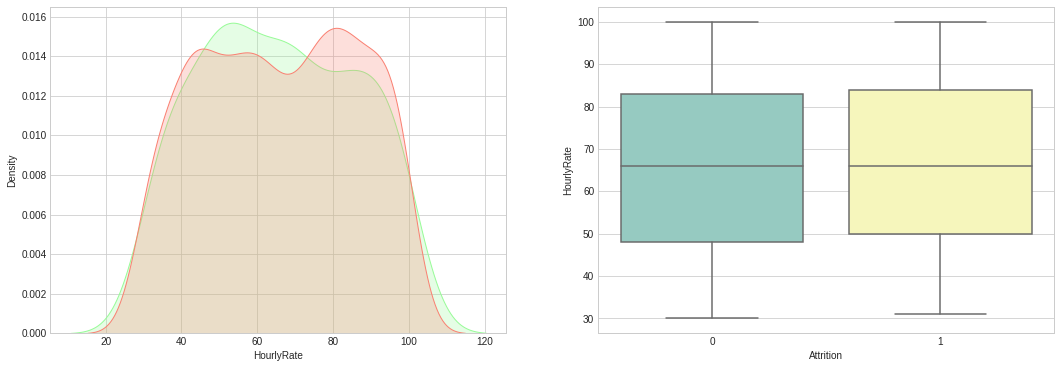

In [32]:
numerical_column_viz("HourlyRate")

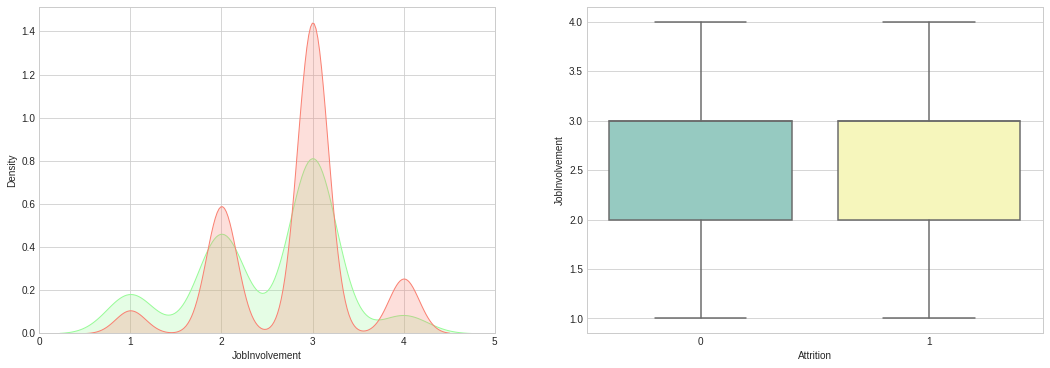

In [33]:
numerical_column_viz("JobInvolvement")

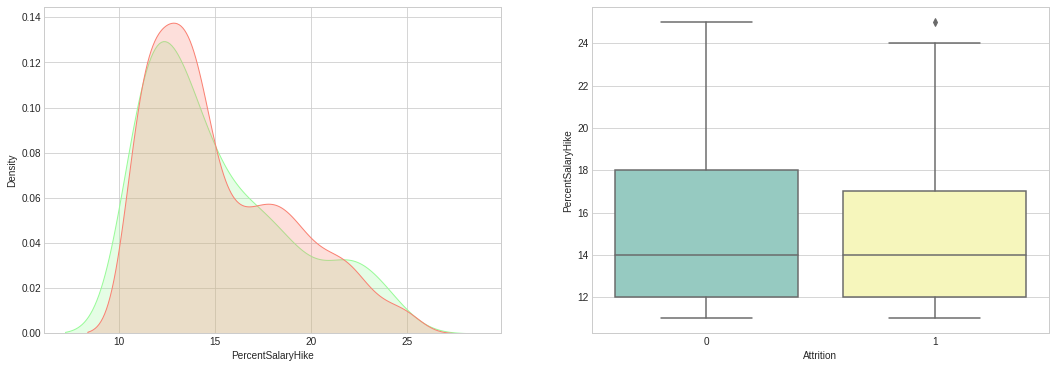

In [34]:
numerical_column_viz("PercentSalaryHike")

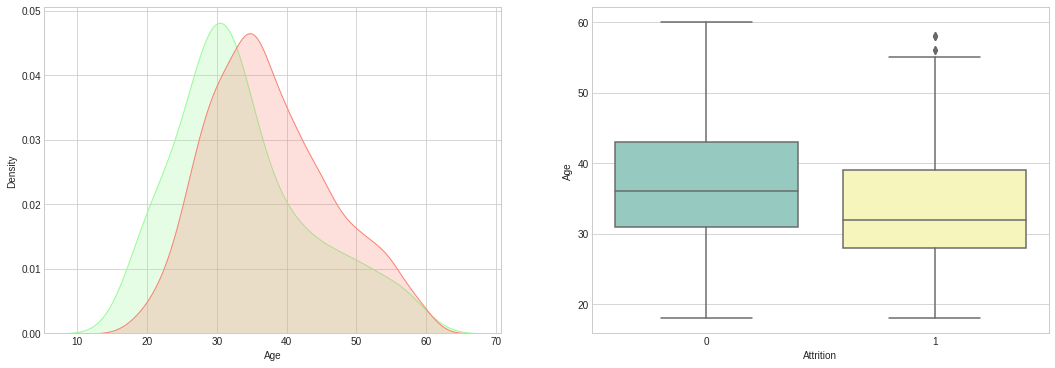

In [35]:
numerical_column_viz("Age")

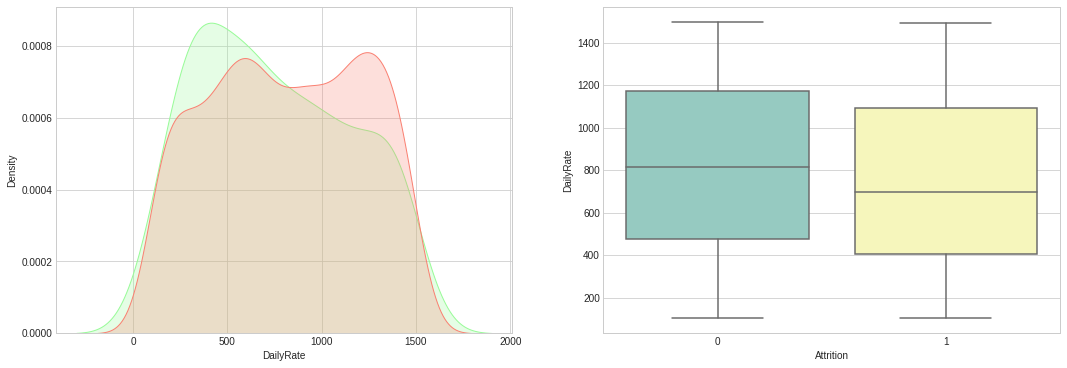

In [36]:
numerical_column_viz("DailyRate")

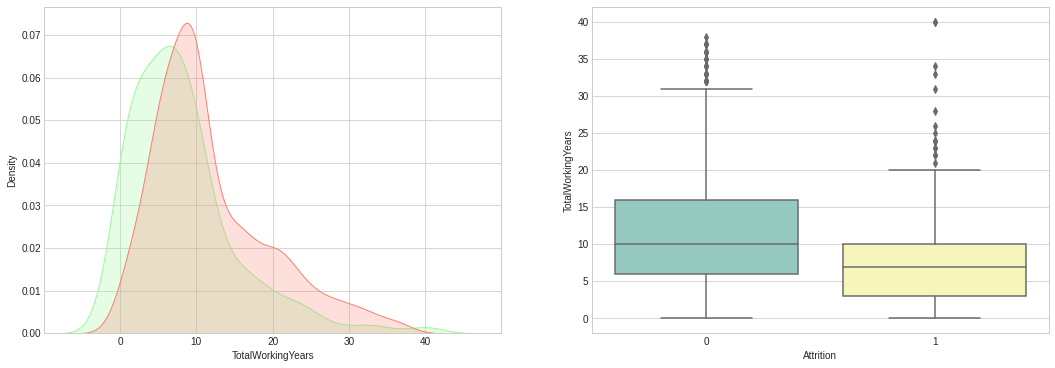

In [37]:
numerical_column_viz("TotalWorkingYears")

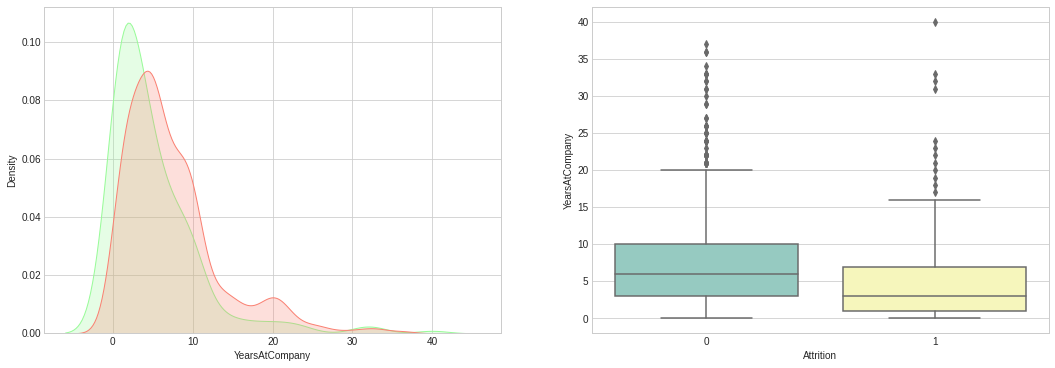

In [38]:
numerical_column_viz("YearsAtCompany")

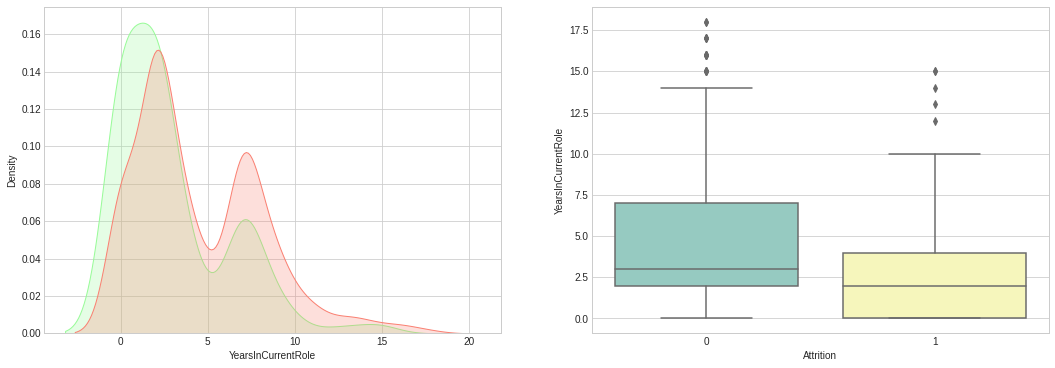

In [39]:
numerical_column_viz("YearsInCurrentRole")

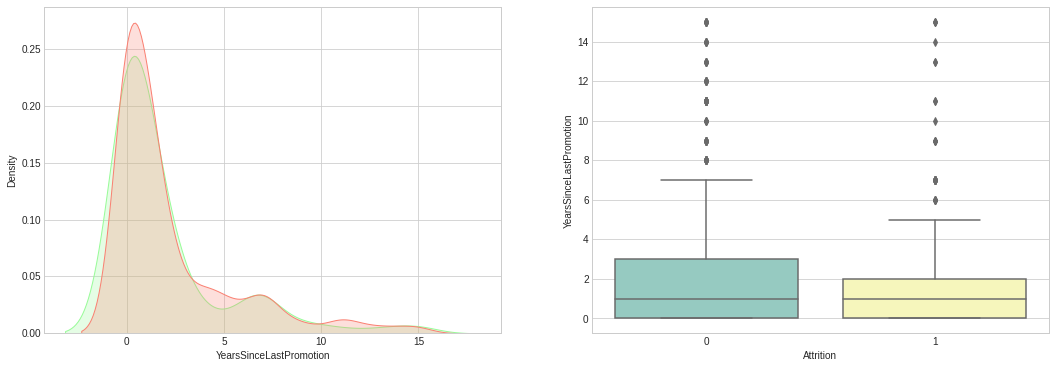

In [40]:
numerical_column_viz("YearsSinceLastPromotion")

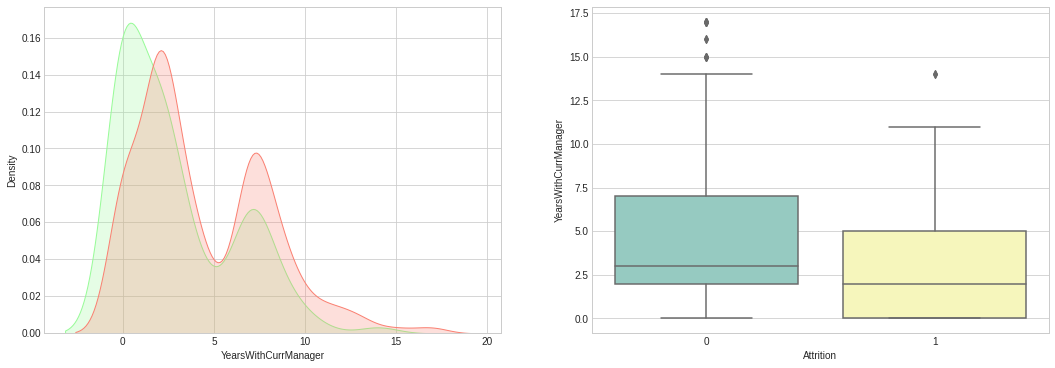

In [41]:
numerical_column_viz("YearsWithCurrManager")

In [42]:
def categorical_numerical(numerical_col, categorical_col1, categorical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(20,8))
    
    g1= sns.swarmplot( categorical_col1, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=90) 

    
    g2 = sns.swarmplot( categorical_col2, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

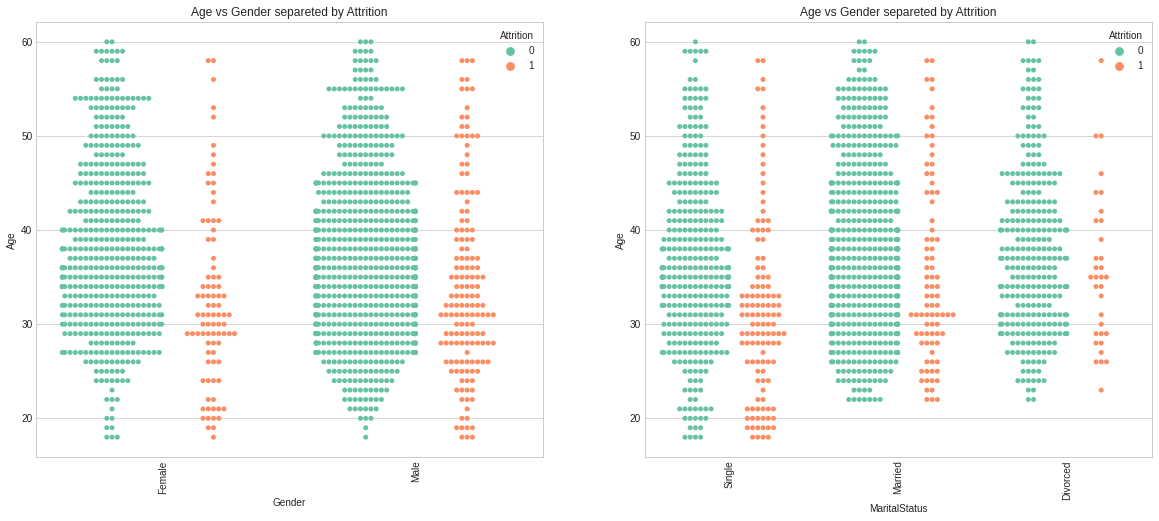

In [43]:
categorical_numerical('Age','Gender','MaritalStatus')

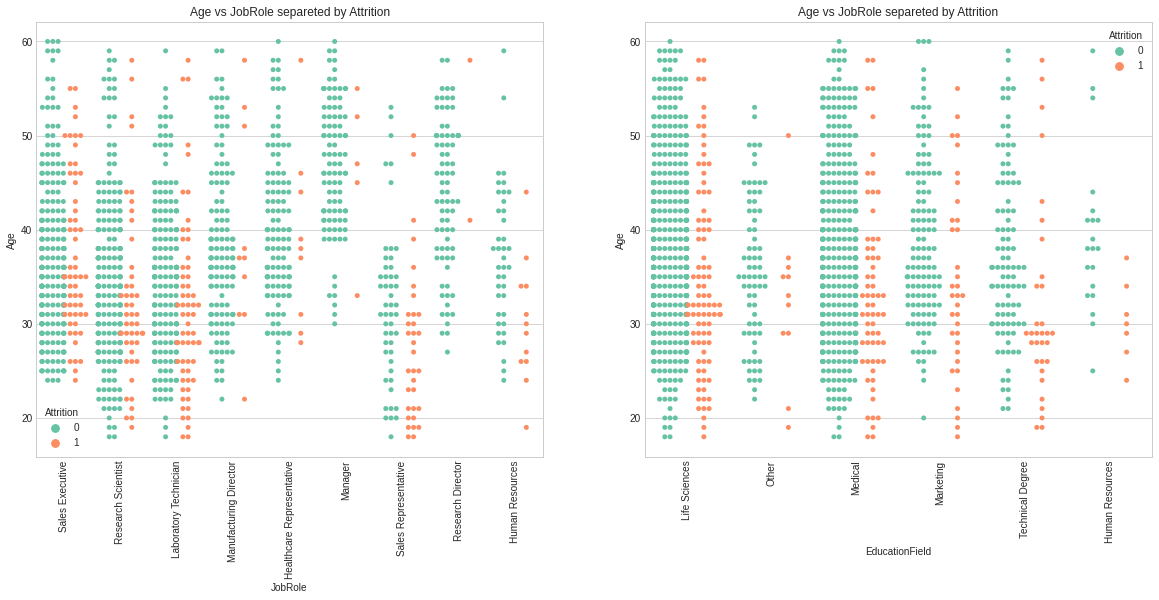

In [44]:
categorical_numerical('Age','JobRole','EducationField')

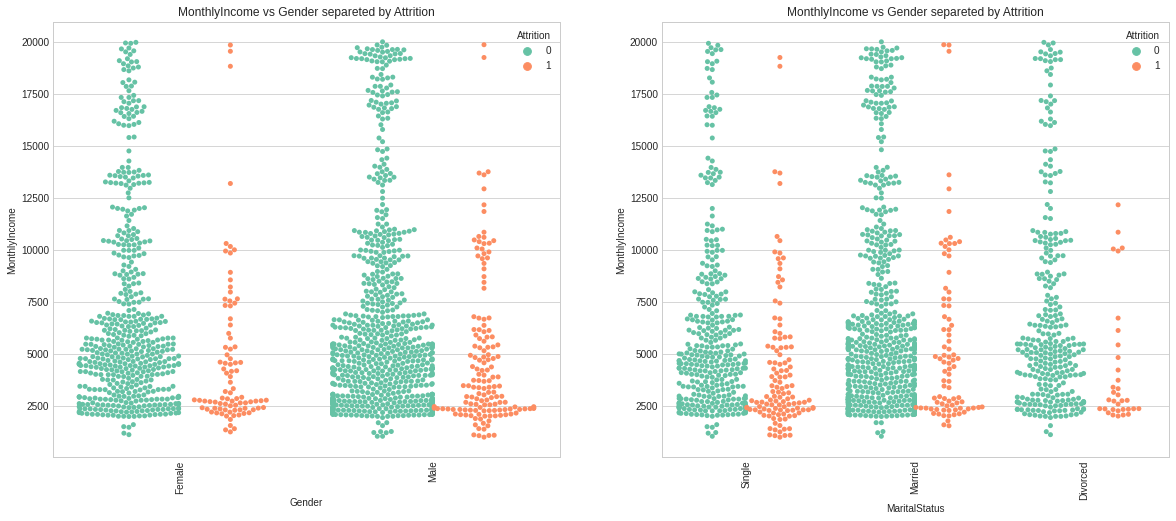

In [45]:
categorical_numerical('MonthlyIncome','Gender','MaritalStatus')

In [46]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

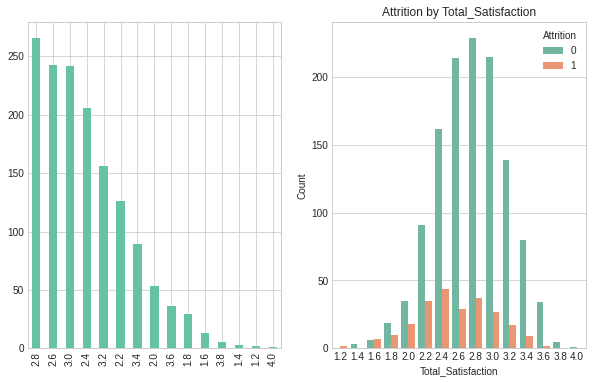

In [47]:
categorical_column_viz('Total_Satisfaction')

In [48]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [49]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 ) 
df.drop('Total_Satisfaction', axis=1, inplace=True)

In [50]:
# It can be observed that the rate of attrition of employees below age of 35 is high

df['Age_bool'] = df['Age'].apply(lambda x:1 if x<35 else 0)
df.drop('Age', axis=1, inplace=True)

In [51]:
# It can be observed that the employees are more likey the drop the job if dailtRate less than 800

df['DailyRate_bool'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
df.drop('DailyRate', axis=1, inplace=True)

In [52]:
# Employees working at R&D Department have higher attrition rate

df['Department_bool'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
df.drop('Department', axis=1, inplace=True)

In [53]:
# Rate of attrition of employees is high if DistanceFromHome > 10

df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
df.drop('DistanceFromHome', axis=1, inplace=True)

In [54]:
# Employees are more likey to drop the job if the employee is working as Laboratory Technician

df['JobRole_bool'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
df.drop('JobRole', axis=1, inplace=True)

In [55]:
# Employees are more likey to the drop the job if the employee's hourly rate < 65

df['HourlyRate_bool'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
df.drop('HourlyRate', axis=1, inplace=True)

In [56]:
# Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000

df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
df.drop('MonthlyIncome', axis=1, inplace=True)

In [57]:
# Rate of attrition of employees is high if NumCompaniesWorked < 3

df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply(lambda x:1 if x>3 else 0)
df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [58]:
# Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8

df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
df.drop('TotalWorkingYears', axis=1, inplace=True)

In [59]:
# Employees are more likey to the drop the job if the employee's YearsAtCompany < 3

df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsAtCompany', axis=1, inplace=True)

In [60]:
# Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3

df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [61]:
# Employees are more likey to the drop the job if the employee's YearsSinceLastPromotion < 1

df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [62]:
# Employees are more likey to the drop the job if the employee's YearsWithCurrManager < 1

df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [63]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [64]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [65]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Total_Satisfaction_bool       1470 non-null   int64   
 12  Age_bool                      1470 non-null   in

In [67]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [68]:
y = df['Attrition']

In [69]:
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,1,1,0,0


In [71]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   0                             1470 non-null   float64
 1   1                             1470 non-null   float64
 2   2                             1470 non-null   float64
 3   3                             1470 non-null   float64
 4   4                             1470 non-null   float64
 5   5                             1470 non-null   float64
 6   6                             1470 non-null   float64
 7   7                             1470 non-null   float64
 8   8                             1470 non-null   float64
 9   9                             1470 non-null   float64
 10  10                            1470 non-null   float64
 11  11                            1470 non-null   float64
 12  12                            1470 non-null   float64
 13  13 

In [72]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [73]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [74]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
1462,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
707,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
522,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,1,1,1
499,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
1444,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,0


In [97]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass

    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [98]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))



Accuracy: 88.73
Accuracy CV 10-Fold: 87.07
Running Time: 0:00:01.772519


In [77]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 87.07
Accuracy CV 10-Fold: 85.81
Running Time: 0:00:00.462437


In [78]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 89.12
Accuracy CV 10-Fold: 86.98
Running Time: 0:00:00.646306


In [79]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 88.53
Accuracy CV 10-Fold: 81.73
Running Time: 0:00:00.279776


In [80]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 77.45
Accuracy CV 10-Fold: 75.7
Running Time: 0:00:00.100870


In [81]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 86.2
Accuracy CV 10-Fold: 80.17
Running Time: 0:00:00.172669


In [82]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 84.26
Accuracy CV 10-Fold: 80.37
Running Time: 0:00:00.213928


In [83]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 75.12
Running Time: 0:00:00.127099


In [84]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.25
Accuracy CV 10-Fold: 84.84
Running Time: 0:00:01.687850


In [85]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 84.65
Running Time: 0:00:01.956438


In [86]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [90]:
pip install pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pool: filename=pool-0.1.2.dev0-py3-none-any.whl size=23389 sha256=41a948aaf77420bd261166e45d4973a757a18385a4caaa3b34aba8074c0350af
  Stored in directory: /root/.cache/pip/wheels/98/d9/aa/12a231e39b7227f54f2ca7d241a70585f5d18dbb6c2fd2fe0a
Successfully built pool


In [ ]:
# pool training data and categorical feature labels together
#from multiprocessing import Pool
train_pool = Pool(X_train, y_train,cat_features)  

In [ ]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

In [ ]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(index=X_test.index)

In [ ]:
pred_df['Attrition'] = predictions
pred_df.head()

In [ ]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [ ]:
print("Accuracy: %s" % score)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()